Parameters of the largest circle:
Center: (106, 257)
Radius: 16
Sigma value: 2.5000000000000013


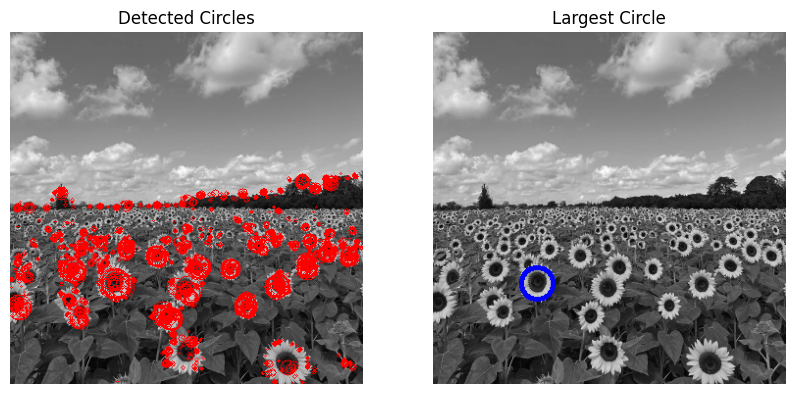

In [41]:
# Q1: Circle Detection

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv.imread('images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
max_sigma = 3.0  # Maximum sigma value (larger values for larger blobs)
step_size = 0.1  # Number of sigma values to test
threshold = 0.4  # Threshold for blob detection

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.arange(min_sigma, max_sigma, step_size):
    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv.Laplacian(blurred, cv.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv.findContours(blob_mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
largest_circle = circles[0]
centerl, radiusl, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {centerl}")
print(f"Radius: {radiusl}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv.circle(output_image, center, radius, (0, 0, 255), line_thickness)  

largest_circle_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)
cv.circle(largest_circle_image,centerl, radiusl, (255, 0, 0), line_thickness+2)

# display images in sampe figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
axs[0].set_title('Detected Circles')
axs[0].axis('off')
axs[1].imshow(cv.cvtColor(largest_circle_image, cv.COLOR_BGR2RGB))
axs[1].set_title('Largest Circle')
axs[1].axis('off')
plt.show()



Q3
Image 1

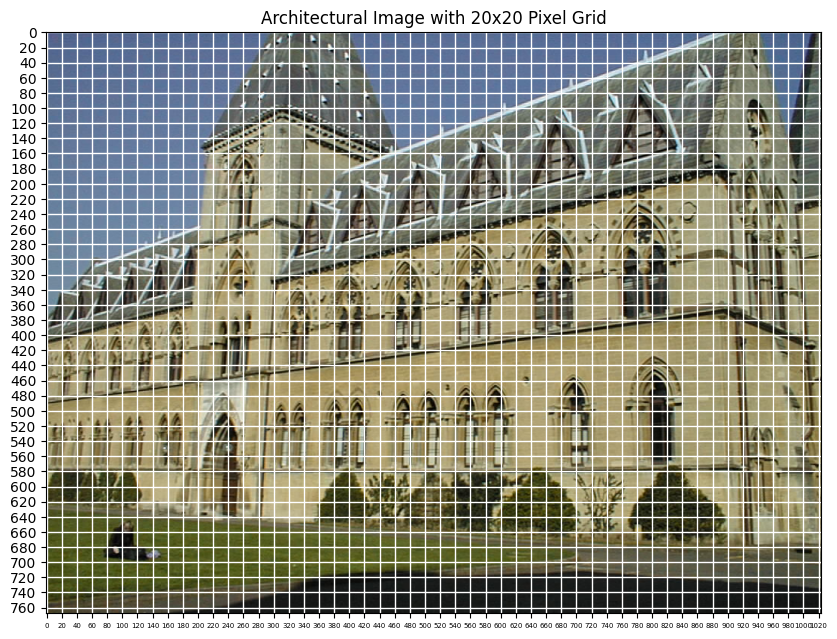

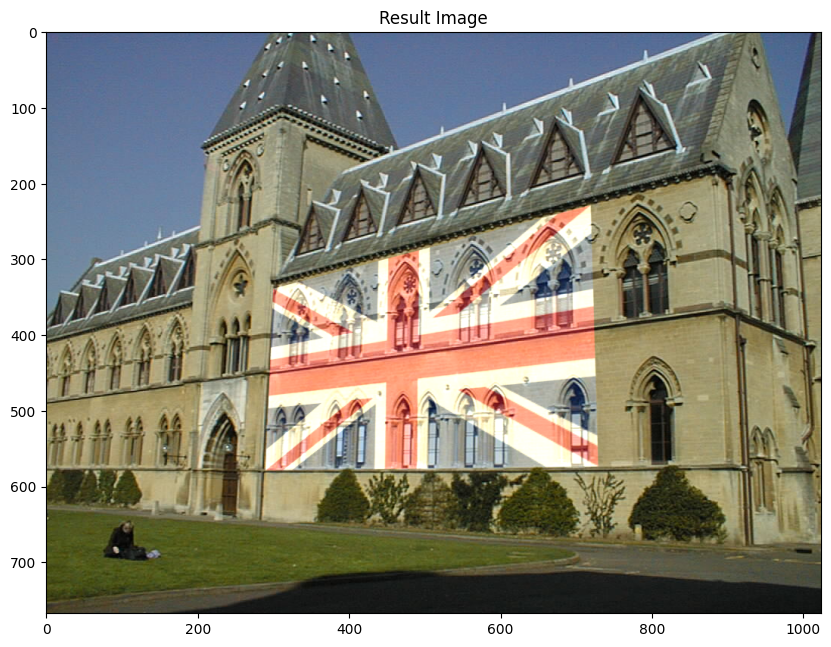

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
building_face = cv.imread('images/Building_face.jpg')
flag_image = cv.imread('images/united kingdom.png')

# Display the architectural image with a 20x20 pixel grid
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(building_face, cv.COLOR_BGR2RGB))
plt.xticks(np.arange(0, building_face.shape[1], 20), fontsize=5)
plt.yticks(np.arange(0, building_face.shape[0], 20))
plt.grid(True, color='white', linewidth=1)
plt.title('Architectural Image with 20x20 Pixel Grid')
plt.show()

# Define the four points on the architectural image that form a planar surface
# Replace these with the actual coordinates
points_on_architecture = np.array([[300, 340], [720, 230], [730, 575], [290, 580]], dtype=np.float32)

# Define the corresponding points on the flag image (in the same order)
points_on_flag = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_on_flag, points_on_architecture)

# Warp the flag image onto the architectural image using the homography
flag_warped = cv.warpPerspective(flag_image, homography_matrix, (building_face.shape[1], building_face.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv.addWeighted(building_face, 1, flag_warped, 0.5, 0)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()

Image 2

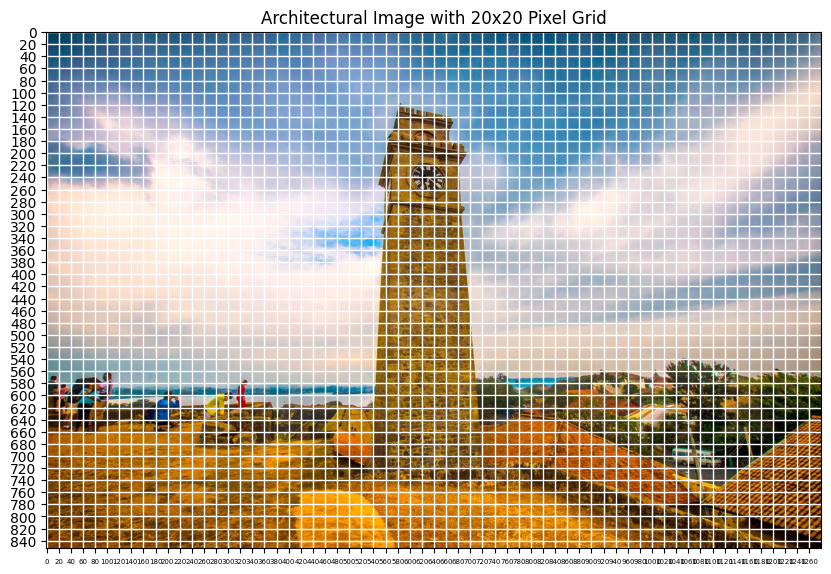

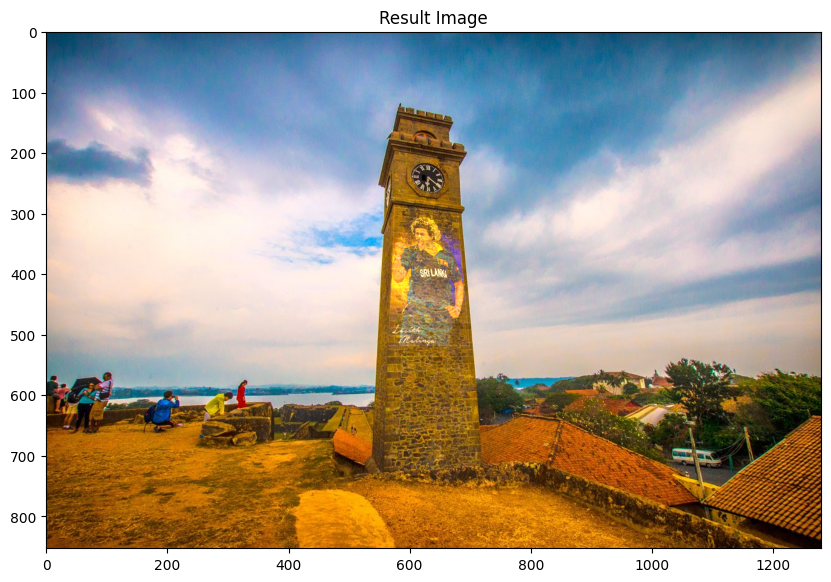

In [71]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
building_face = cv.imread('images/clock_tower.jpg')
flag_image = cv.imread('images/Lasith_malinga.jpeg')

# Display the architectural image with a 20x20 pixel grid
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(building_face, cv.COLOR_BGR2RGB))
plt.xticks(np.arange(0, building_face.shape[1], 20), fontsize=5)
plt.yticks(np.arange(0, building_face.shape[0], 20))
plt.grid(True, color='white', linewidth=1)
plt.title('Architectural Image with 20x20 Pixel Grid')
plt.show()

# Define the four points on the architectural image that form a planar surface
# Replace these with the actual coordinates
points_on_architecture = np.array([[575, 290], [680, 300], [700, 520], [565, 520]], dtype=np.float32)

# Define the corresponding points on the flag image (in the same order)
points_on_flag = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv.findHomography(points_on_flag, points_on_architecture)

# Warp the flag image onto the architectural image using the homography
flag_warped = cv.warpPerspective(flag_image, homography_matrix, (building_face.shape[1], building_face.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv.addWeighted(building_face, 1, flag_warped, 0.75, 0)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()

Q4

[[ 3.24288397e-01 -4.96176148e-01  1.08180160e+02]
 [ 1.01091939e+00 -1.63760909e+00  3.64839355e+02]
 [ 2.79837993e-03 -4.49670554e-03  1.00000000e+00]]


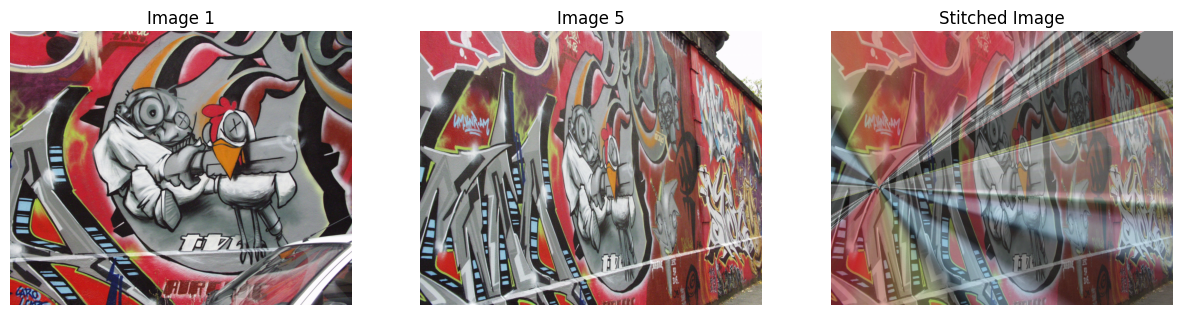

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the images
# img1_orig = cv2.imread('images/sift/001.jpg')
# img5_orig = cv2.imread('images/sift/002.jpg')

img1_orig = cv2.imread('images/sift/img1.ppm')
img5_orig = cv2.imread('images/sift/img5.ppm')

# Convert the images to grayscale
img1 = cv2.cvtColor(img1_orig, cv2.COLOR_BGR2GRAY)
img5 = cv2.cvtColor(img5_orig, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints5, descriptors5 = sift.detectAndCompute(img5, None)

# Match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors5, k=2)

# Apply Lowe's Ratio Test to filter matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# RANSAC to estimate homography
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
homography, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# open h1to5p file and get homography matrix
homography_1 = np.loadtxt('h1to5p')










# Warp img1 onto img5
stitched_img = cv2.warpPerspective(img1_orig, homography, (img5.shape[1], img5.shape[0]))
print(homography)



# Blend the two images (e.g., using cross-dissolve)
result = cv2.addWeighted(img5_orig, 0.5, stitched_img, 0.5, 0)

# plot 2 original images and the stitched image in a single figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(img1_orig, cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(img5_orig, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image 5')
axs[1].axis('off')
axs[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[2].set_title('Stitched Image')
axs[2].axis('off')
plt.show()




